In [1]:
#import section
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#read section
df=pd.read_csv('student_performance_new.csv')

In [4]:
#pre-process section
df=df.dropna()

In [5]:
#feature selection
ip=df[['Test Total ','Quiz','Assignment ','Unnamed: 15']]
tar=df['Result']

In [6]:
# train-test split
#15--> best random state for test data
#46--> best random state for train data
#22--> used state for experiment

#train_test_split(ip,tar,test_size=0.2,random_state= 22)
iptrain,iptest,tartrain,tartest=train_test_split(ip,tar,test_size=0.2,random_state= 15)

In [7]:
#create model and train data
model=tree.DecisionTreeClassifier(max_depth=3)
model.fit(iptrain,tartrain) 

DecisionTreeClassifier(max_depth=3)

In [8]:
#model purity/accuracy
model.score(iptrain,tartrain)

0.9047619047619048

In [9]:
#model accuracy on test data
tarpred=model.predict(iptest)
print("Accuracy=",accuracy_score(tartest,tarpred))
print("Precision=",precision_score(tartest,tarpred))
print("Recall Score=",recall_score(tartest,tarpred))
print("F1 Score=",f1_score(tartest,tarpred)) 

Accuracy= 1.0
Precision= 1.0
Recall Score= 1.0
F1 Score= 1.0


<AxesSubplot:>

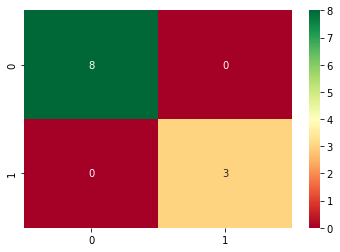

In [10]:
#confusion matrix on test data 
confmattest=confusion_matrix(tartest,tarpred)
sns.heatmap(confmattest,cmap='RdYlGn',annot=True)

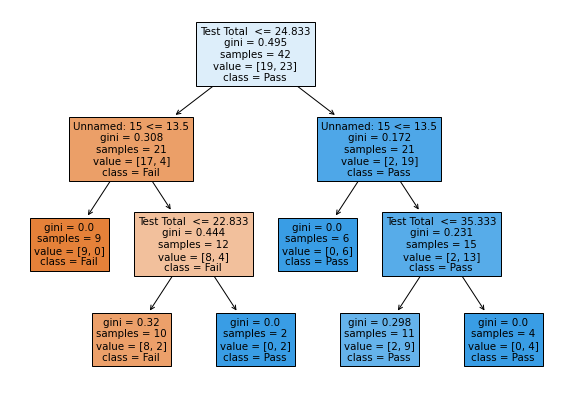

In [11]:
#plot decision tree on test data
plt.figure(figsize=(10,7))
a=tree.plot_tree(model,feature_names=list(ip.columns),filled=True,class_names=["Fail",'Pass'])
plt.show()

In [13]:
#model accuracy on custom data
cusip=[[32,5,14,13]]
res=model.predict(cusip)
if res==0:
    print('Fail')
else:
    print('Pass')

Pass


/home/dell/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
